* Importing required libraries

In [18]:
# Loading the required 

import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd

In [19]:
# data requiremenet directory
train_dir = "train"
valid_dir = "valid"

In [20]:
# ggplot style setting 
plt.style.use("ggplot")

In [21]:
# checking  the list of files in working directory 
classes = os.listdir(train_dir)

In [22]:
train_values = [] 
for c in classes:
    train_values.append(len(os.listdir(train_dir+'/'+c)))

In [23]:
valid_values = []
for c in classes:
    valid_values.append(len(os.listdir(valid_dir+'/'+c)))

In [24]:
valid_values

[22, 132, 237, 44]

In [25]:
indexes = [0,1,2,3]

### Before Data Augmented

##### Different class number of counts of different class before augmented in training data

Text(0.5, 1.0, 'Distribution of Classes in Training Set')

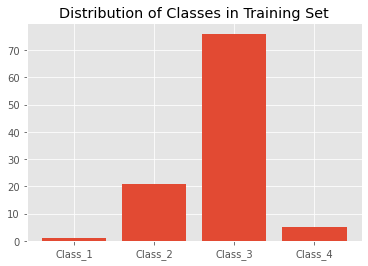

In [9]:


%matplotlib inline
plt.bar(indexes,train_values)
plt.xticks(indexes,classes)
plt.title("Distribution of Classes in Training Set")

Text(0.5, 1.0, 'Distribution of Classes in Validation Set')

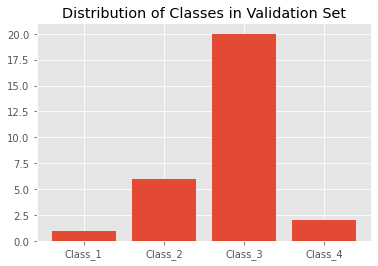

In [10]:
# Number of different class count in Validation data

plt.bar(indexes,valid_values)
plt.xticks(indexes,classes)
plt.title("Distribution of Classes in Validation Set")

In [11]:
classes

['Class_1', 'Class_2', 'Class_3', 'Class_4']

1.KDE Plots
* A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset, analagous to a histogram. KDE represents the data using a continuous probability density curve in one or more dimensions.

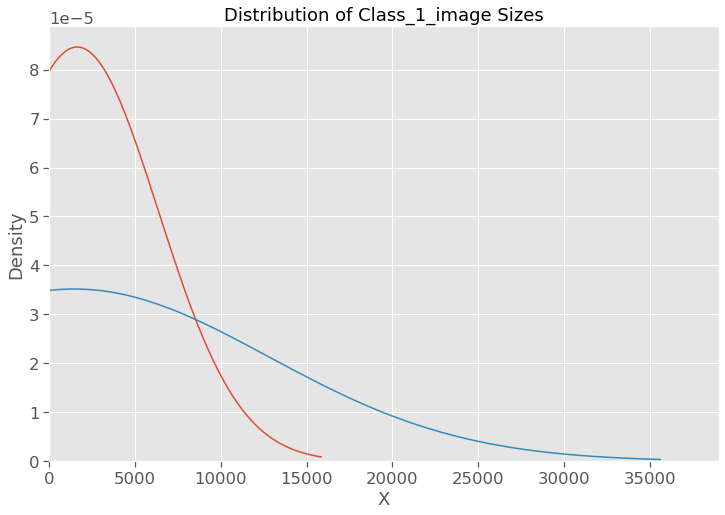

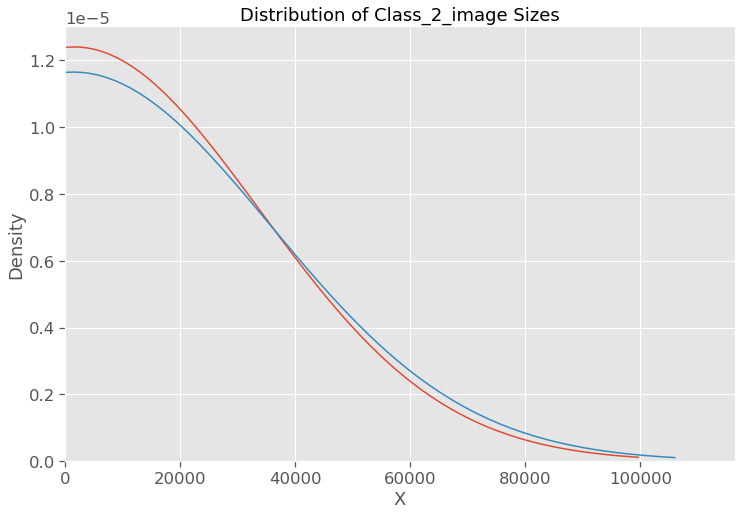

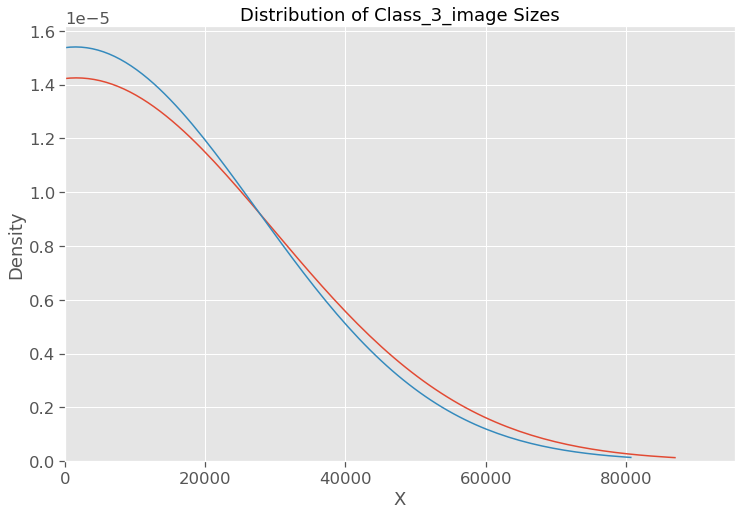

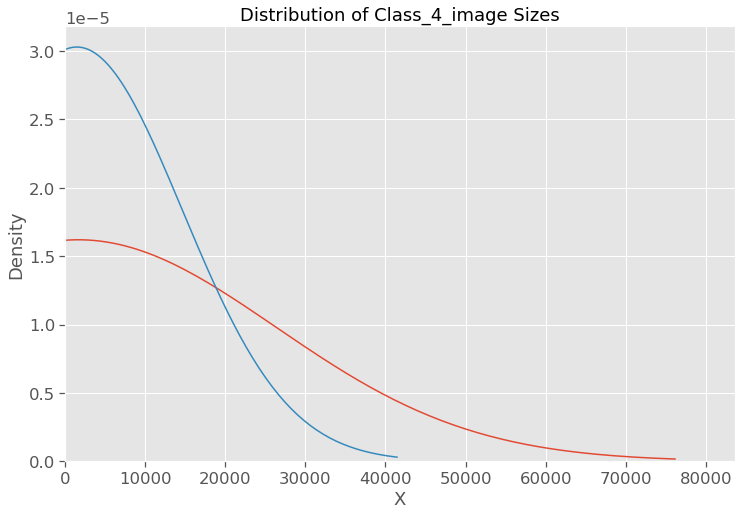

In [17]:
# Distribution of class_1, class_2, class_3 and class_4 class images

import pathlib
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread
import pathlib
import warnings
warnings.filterwarnings('ignore')
for i in classes:
    sample_images = list(pathlib.Path('exp_data/'+i+'/').rglob('*/')) 
    np.random.seed(42)
    rand_imgs = np.random.choice(sample_images, size=10*10)

    shapes = []
    for img in rand_imgs:
        shapes.append(imread(str(img)).shape)
    
    shapes = pd.DataFrame().assign(X=pd.Series(shapes).map(lambda s: s[0]), Y=pd.Series(shapes).map(lambda s: s[1]))
    
    plt.figure(figsize=(12, 8))
    sns.set_context("notebook", font_scale=1.5)
    sns.kdeplot(shapes['X'], bw=75)
    sns.kdeplot(shapes['Y'], bw=75)
    plt.title('Distribution of {}_image Sizes'.format(i))
    ax = plt.gca()
    ax.set_xlim(0, ax.get_xlim()[1])

### After Augmented (Augmentattion done in NoteBook:BCS_Data_Augmentation_final)

Text(0.5, 1.0, 'Distribution of Classes in Training Set after augmented')

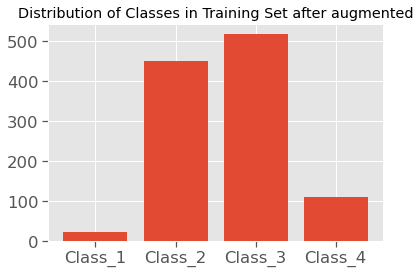

In [26]:
# After Augmentation of data 
# The number of class count of different class in Training data 

%matplotlib inline
plt.bar(indexes,train_values)
plt.xticks(indexes,classes)
plt.title("Distribution of Classes in Training Set after augmented")

Text(0.5, 1.0, 'Distribution of Classes in Validation Set after augmented')

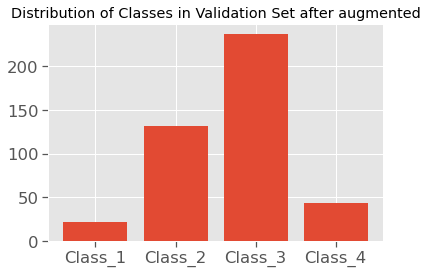

In [27]:
# After augmentation of data 
# The number of class count of different class in Validation data

plt.bar(indexes,valid_values)
plt.xticks(indexes,classes)
plt.title("Distribution of Classes in Validation Set after augmented")

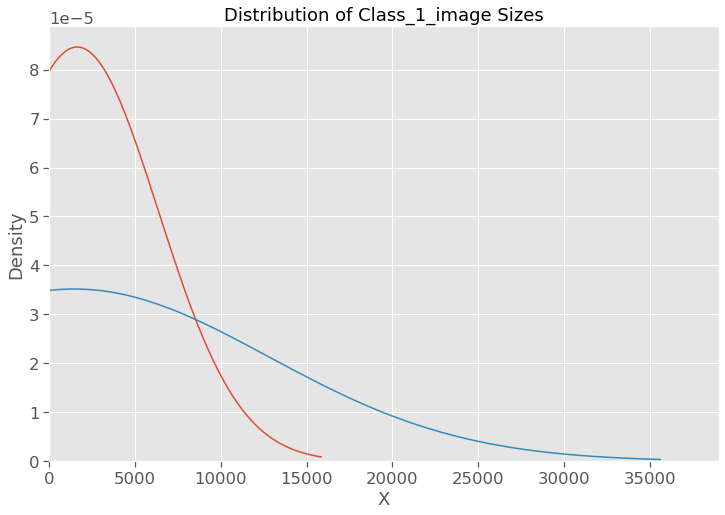

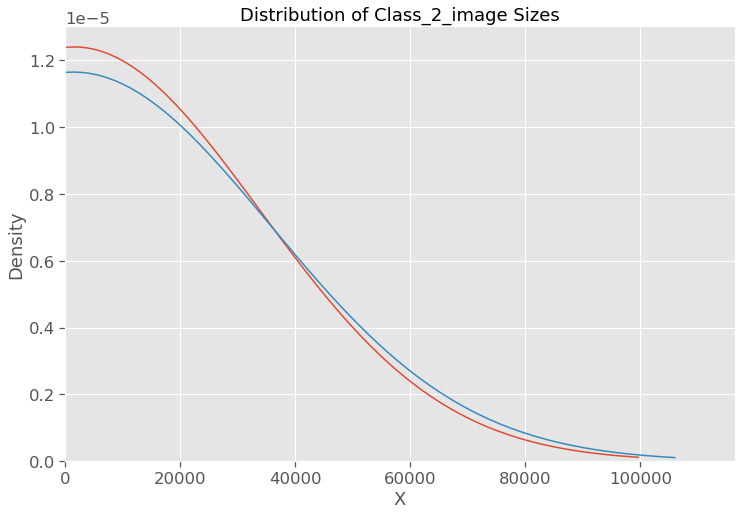

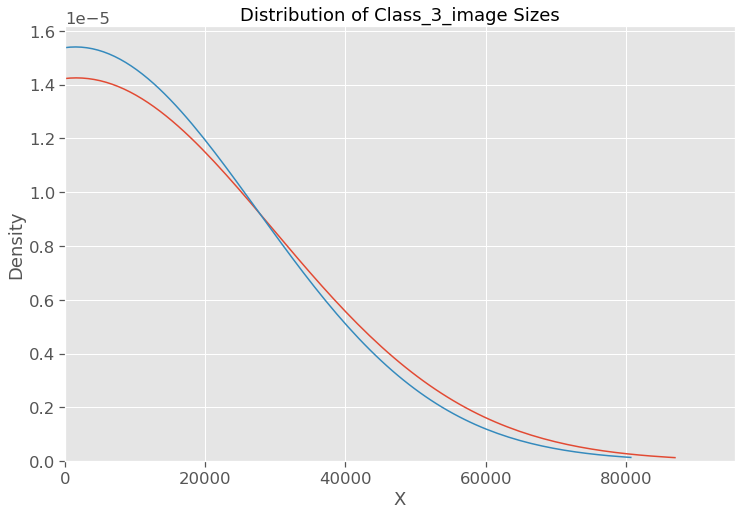

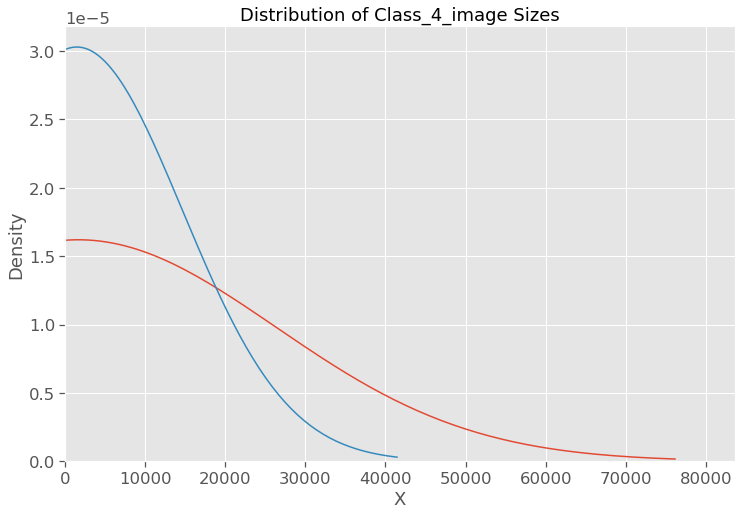

In [28]:
# After data augmentation Class distribution of Class_1, Class_2, Class_3 and Class_4

import pathlib
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread
import pathlib
import warnings
warnings.filterwarnings('ignore')
for i in classes:
    sample_images = list(pathlib.Path('exp_data/'+i+'/').rglob('*/')) 
    np.random.seed(42)
    rand_imgs = np.random.choice(sample_images, size=10*10)

    shapes = []
    for img in rand_imgs:
        shapes.append(imread(str(img)).shape)
    
    shapes = pd.DataFrame().assign(X=pd.Series(shapes).map(lambda s: s[0]), Y=pd.Series(shapes).map(lambda s: s[1]))
    
    plt.figure(figsize=(12, 8))
    sns.set_context("notebook", font_scale=1.5)
    sns.kdeplot(shapes['X'], bw=75)
    sns.kdeplot(shapes['Y'], bw=75)
    plt.title('Distribution of {}_image Sizes'.format(i))
    ax = plt.gca()
    ax.set_xlim(0, ax.get_xlim()[1])

### Visualize Sample Data

##### The Sample images of training images

In [3]:
 

from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

In [4]:
# the data is retriving from image_dataset_from_directory 
batch_size = 32
raw_train_ds = tf.keras.preprocessing.image_dataset_from_directory(
        'exp_data', batch_size = batch_size, validation_split=0.2, subset = 'training', seed = 42)

Found 132 files belonging to 4 classes.
Using 106 files for training.


##### Checking the number of class images 

In [5]:


print(raw_train_ds.class_names)
class_names = raw_train_ds.class_names

['Class_1', 'Class_2', 'Class_3', 'Class_4']


###### plotting the sample images of data set 

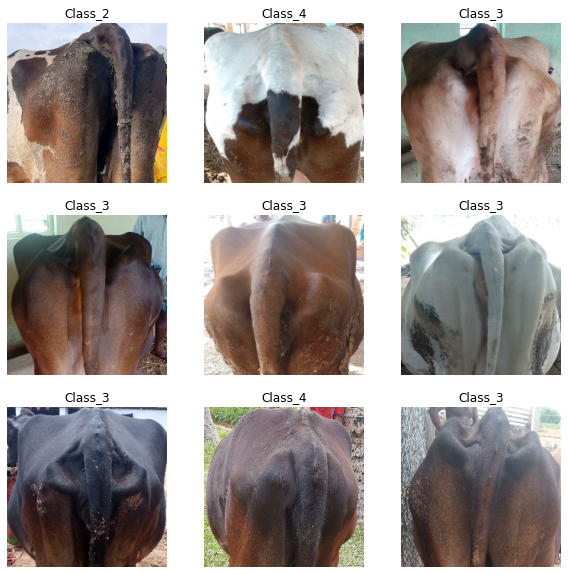

In [6]:


import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in raw_train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")